<a href="https://colab.research.google.com/github/mastersigat/GeoPandas/blob/main/S%C3%A9ance_2_Manipulation_donn%C3%A9es_spatiales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Séance 2 / Manipulation de données spatiales

In [ ]:
#Initialisation de l'environnement avec geopandas
!apt update
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Instal contextily
!pip install contextily
#Depuis sa version 0.8, Geopandas peut fonctionner de manière expérimental avec Pygeos ce qui accèlère certaines opérations
!pip install pygeos


Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:15 http://se

In [ ]:
#Importation des librairies nécessaires
import pandas as pd #Gestion de données
import matplotlib.pyplot as plt #Visualisation de données
import geopandas as gpd #Gestion données sptiales
import contextily as ctx #Fond de carte
import os
import numpy as np
import shapely

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


## Importer des données spatiales

In [ ]:
#Téléchargement des datas depuis le site opendata de Paris
!wget -O velib.geojson https://opendata.paris.fr/explore/dataset/velib-disponibilite-en-temps-reel/download/?format=geojson&timezone=Europe/Berlin&lang=fr
!wget -O IRIS.geojson https://data.iledefrance.fr/explore/dataset/iris/download/?format=geojson&refine.dep=75&timezone=Europe/Berlin&lang=fr 

--2021-03-01 16:12:13--  https://opendata.paris.fr/explore/dataset/velib-disponibilite-en-temps-reel/download/?format=geojson
Resolving opendata.paris.fr (opendata.paris.fr)... 34.248.20.69, 34.249.199.226
Connecting to opendata.paris.fr (opendata.paris.fr)|34.248.20.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/json]
Saving to: ‘velib.geojson’

velib.geojson           [   <=>              ] 630.03K  1.05MB/s    in 0.6s    

2021-03-01 16:12:15 (1.05 MB/s) - ‘velib.geojson’ saved [645153]

--2021-03-01 16:12:15--  https://data.iledefrance.fr/explore/dataset/iris/download/?format=geojson
/bin/bash: refine.dep=75: command not found
Resolving data.iledefrance.fr (data.iledefrance.fr)... 171.33.103.241, 109.232.232.161
Connecting to data.iledefrance.fr (data.iledefrance.fr)|171.33.103.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/json]
Saving to: ‘IRIS.geojson’

IRIS.geojson    

### La couche IRIS

,iris,nom_iris,typ_iris,dep,insee_com,nom_com,code_iris,geometry
0,1907,Val de Grace 7,H,75,75105,Paris 5e Arrondissement,751051907,"POLYGON ((2.34364 48.84122, 2.34424 48.84245, ..."
1,2807,Gros Caillou 7,H,75,75107,Paris 7e Arrondissement,751072807,"POLYGON ((2.30090 48.85113, 2.29990 48.85173, ..."
2,3103,Madeleine 3,A,75,75108,Paris 8e Arrondissement,751083103,"POLYGON ((2.31961 48.87451, 2.31962 48.87449, ..."
3,4318,Roquette 18,H,75,75111,Paris 11e Arrondissement,751114318,"POLYGON ((2.38202 48.86019, 2.38281 48.85939, ..."
4,4114,Folie Mericourt 14,H,75,75111,Paris 11e Arrondissement,751114114,"POLYGON ((2.37303 48.87062, 2.37301 48.87041, ..."


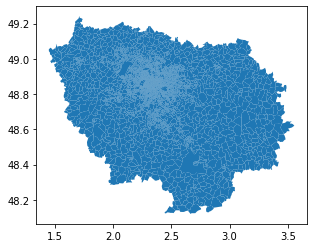

In [ ]:
#Importer le couche des IRIS

IRIS= gpd.read_file("IRIS.geojson", encoding='utf-8')
IRIS.plot()
IRIS.head()

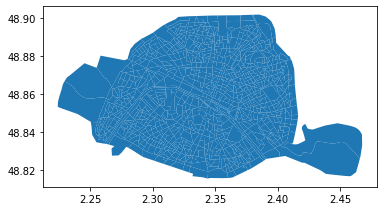

In [ ]:
#Garder les IRIS de Paris

IRISPARIS = IRIS[(IRIS["dep"] == 75)]
IRISPARIS.plot()

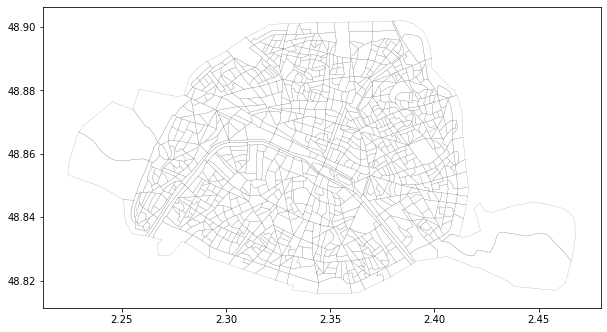

In [ ]:
#Cartographier les IRIS en mode contours

IRISPARIS.boundary.plot(figsize=(10,10), linewidth=0.2, color = 'grey')

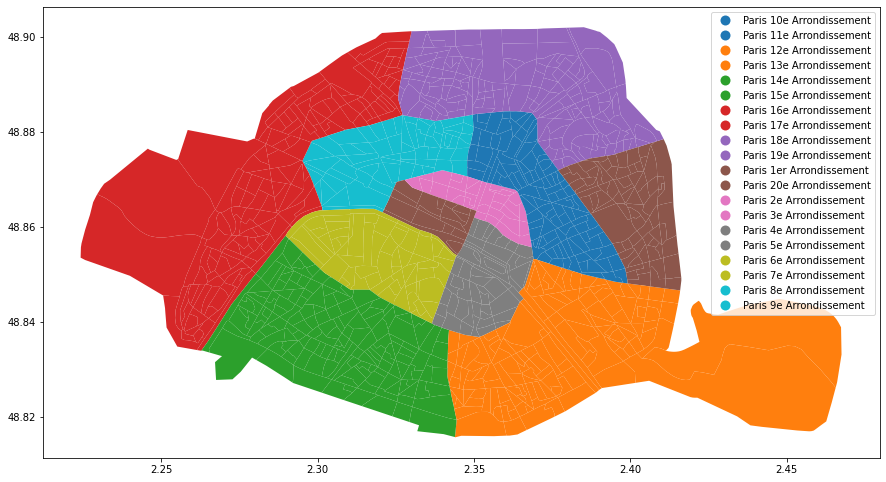

In [ ]:
#Cartographier les IRIS en fonction de l'arrondissement

IRISPARIS.plot(column = 'nom_com', linewidth=0.5, figsize=(15,20), legend=True)

### La couche Vélibs

,ebike,capacity,name,nom_arrondissement_communes,numbikesavailable,mechanical,stationcode,is_installed,is_renting,numdocksavailable,duedate,is_returning,geometry
0,1,35,Benjamin Godard - Victor Hugo,Paris,3,2,16107,OUI,OUI,32,2021-03-01T15:31:45+00:00,OUI,POINT (2.27572 48.86598)
1,7,55,André Mazet - Saint-André des Arts,Paris,32,25,6015,OUI,OUI,23,2021-03-01T15:35:32+00:00,OUI,POINT (2.33910 48.85376)
2,4,21,Toudouze - Clauzel,Paris,5,1,9020,OUI,OUI,15,2021-03-01T15:35:02+00:00,OUI,POINT (2.33736 48.87930)
3,1,20,Charonne - Robert et Sonia Delauney,Paris,2,1,11104,OUI,OUI,18,2021-03-01T15:31:20+00:00,OUI,POINT (2.39257 48.85591)
4,1,30,Mairie du 12ème,Paris,3,2,12109,OUI,OUI,27,2021-03-01T15:35:34+00:00,OUI,POINT (2.38755 48.84086)


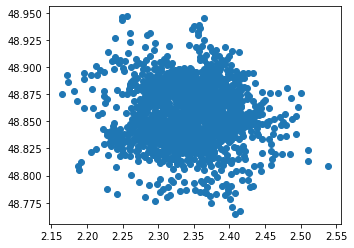

In [ ]:
#Importer la couche des velibs

Velib= gpd.read_file("velib.geojson", encoding='utf-8')
Velib.plot()
Velib.head()

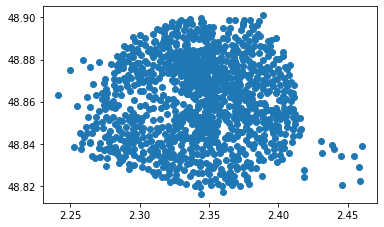

In [ ]:
#Ne garder que les stations de Velibs de la ville de Paris (sélection par localisation)

VelibParis = gpd.overlay(Velib, IRISPARIS, how='intersection')
VelibParis.plot()


## Ecrire un jeu de données spatiales

https://geopandas.org/docs/user_guide/io.html

In [ ]:
#Ecrire un geojson

VelibParis.to_file("Velibs.geojson", driver="GeoJSON")

#Ecrire un shapefile

VelibParis.to_file("Velibs.shp")

#Ecrire un gpk

IRISPARIS.to_file("Paris.gpkg", layer='IRIS', driver="GPKG")
VelibParis.to_file("Paris.gpkg", layer='VelibParis', driver="GPKG")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  import sys


## Calculer des statistique basiques (descriptives)

In [ ]:
#Calculer des statistiques basiques pour tous les champs

VelibParis.describe()

,ebike,capacity,numbikesavailable,mechanical,numdocksavailable,iris,dep,insee_com,code_iris
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.0,998.000000,9.980000e+02
mean,2.836673,32.243487,10.741483,7.904810,21.048096,4801.746493,75.0,75112.356713,7.511284e+08
std,2.356914,12.795194,10.642890,9.760418,12.873339,2086.639087,0.0,5.202905,5.411278e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,101.000000,75.0,75101.000000,7.510101e+08
25%,1.000000,23.000000,3.000000,1.000000,12.000000,3303.250000,75.0,75109.000000,7.510933e+08
50%,2.000000,30.000000,7.000000,4.000000,20.000000,5016.500000,75.0,75113.000000,7.511350e+08
75%,4.000000,39.000000,15.000000,12.000000,29.000000,6503.500000,75.0,75117.000000,7.511765e+08
max,16.000000,74.000000,65.000000,63.000000,67.000000,8026.000000,75.0,75120.000000,7.512080e+08


In [ ]:
# Calculer le nombre de stations de vélibs

VelibParis["ebike"].size

998

In [ ]:
# Calculer la somme totale des capacités

VelibParis["capacity"].sum()

32179

In [ ]:
# Calculer la moyenne des capacités

VelibParis["capacity"].mean()

32.243486973947896

In [ ]:
#Calculer le nombre total de station de vélibs, le nombre total de places de vélibs et le nombre moyen de vélibs par station
A=VelibParis['stationcode'].size
B=VelibParis['capacity'].sum()
C=VelibParis['capacity'].mean()

print(A,B,C)

998 32179 32.243486973947896


In [ ]:
# Calculer le nombre de vélos disponibles et d'emplacement disponibles

## Cartographie thématique

In [ ]:
#Installer la librarie 'mapclassify' pour la cartographie thématique   > https://pysal.org/mapclassify/index.html

!pip install mapclassify
import mapclassify

Couleurs de ColorBrewer > https://www.datanovia.com/en/wp-content/uploads/dn-tutorials/ggplot2/figures/101-rcolorbrewer-palette-rcolorbrewer-palettes-1.png 


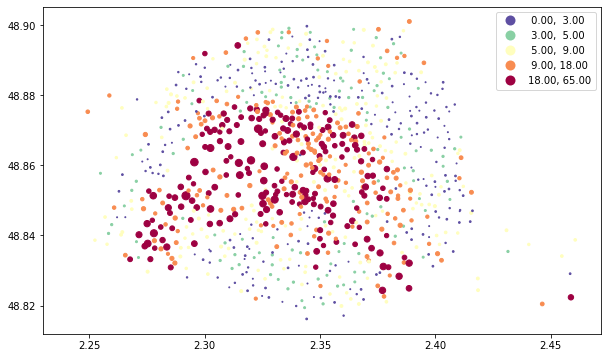

In [ ]:
#Cartographier le nombre de vélibs disponibles par station

VelibParis.plot(figsize=(10,10),column="numbikesavailable", markersize="numbikesavailable",alpha=1, cmap='Spectral_r',scheme='quantiles', categorical=False, legend=True)


#### Ajouter un fond de carte

https://dlab.berkeley.edu/blog/*adding*-basemaps-python-contextily

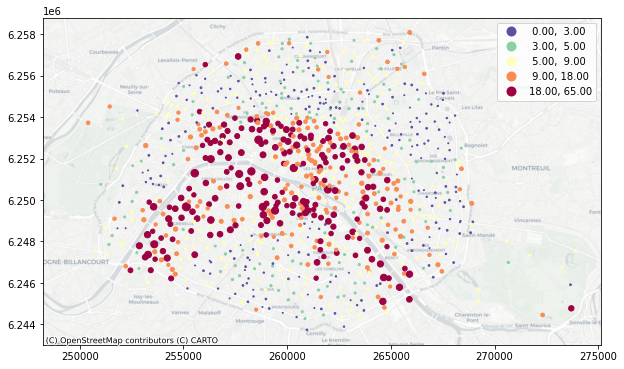

In [ ]:
#Cartographier le nombre de vélibs disponibles par station avec un fond de carte

ax = VelibParis.to_crs('EPSG:3857').plot(figsize=(10,10),column="numbikesavailable", markersize="numbikesavailable",alpha=1, cmap='Spectral_r',scheme='quantiles', categorical=False, legend=True)
ctx.add_basemap(ax,  source=ctx.providers.CartoDB.Positron)


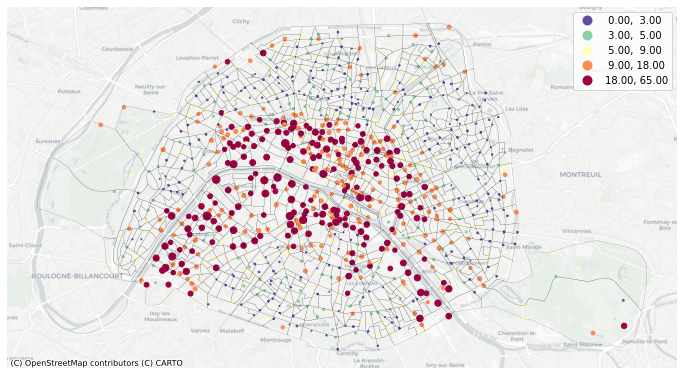

In [ ]:
#Faire une carte avec deux couches

Carte1, ax = plt.subplots(figsize=(12,12))
IRISPARIS.boundary.to_crs('EPSG:3857').plot(ax=ax, linewidth=0.1, color = 'black'))
VelibParis.to_crs('EPSG:3857').plot(ax=ax,column="numbikesavailable", markersize="numbikesavailable",alpha=1, cmap='Spectral_r',scheme='quantiles', categorical=False, legend=True)
ctx.add_basemap(ax,  source=ctx.providers.CartoDB.Positron)
ax.axis("off")
plt.show()

In [ ]:
# Enreigistrer une carte en image

Carte1.savefig("Carte1.png")

## Jointure attributaire, calcul d'indicateurs, cartographie thématique

In [ ]:
#Téléchargement des datas depuis l'opendata (https://opendata.apur.org/datasets/recensement-iris-population/geoservice)
!wget -O population.csv https://opendata.arcgis.com/datasets/b2936d51b66b4213ae9351657fa230ac_0.csv?outSR=%7B%22latestWkid%22%3A2154%2C%22wkid%22%3A102110%7D


--2021-03-01 16:37:12--  https://opendata.arcgis.com/datasets/b2936d51b66b4213ae9351657fa230ac_0.csv?outSR=%7B%22latestWkid%22%3A2154%2C%22wkid%22%3A102110%7D
Resolving opendata.arcgis.com (opendata.arcgis.com)... 3.225.243.7, 3.210.242.135, 3.216.65.78, ...
Connecting to opendata.arcgis.com (opendata.arcgis.com)|3.225.243.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘population.csv’

population.csv          [  <=>               ]   2.70M  6.20MB/s    in 0.4s    

2021-03-01 16:37:18 (6.20 MB/s) - ‘population.csv’ saved [2829414]



In [ ]:
#Importer CSV to dataframe

population = pd.read_csv("population.csv", sep=',')
population.head(3)

,OBJECTID,n_sq_ir,c_cainsee,n_qu,c_ir,c_typeir,l_ir,m2_ip,m2_pop,m2_emp,nb_pop,nb_pop_n5,nb_pop_1999,nb_evo_pop,nb_evo_pop_n5,pct_evo_pop,pct_evo_pop_n5,nb_surface,nb_densite,nb_p_age_0,nb_p_age_5,nb_p_age_10,nb_p_age_15,nb_p_age_20,nb_p_age_25,nb_p_age_30,nb_p_age_35,nb_p_age_40,nb_p_age_45,nb_p_age_50,nb_p_age_55,nb_p_age_60,nb_p_age_65,nb_p_age_70,nb_p_age_75,nb_p_age_80,nb_p_age_85,nb_p_age_90p,nb_age_019,nb_age_60p,nb_age_65p,nb_age_75p,pct_age_019,pct_age_60p,pct_age_65p,pct_age_75p,nb_age_019_n5,nb_age_60p_n5,nb_age_65p_n5,nb_age_75p_n5,pct_age_019_n5,pct_age_60p_n5,pct_age_65p_n5,pct_age_75p_n5,pct_evo_age_019,pct_evo_age_60p,pct_evo_age_65p,pct_evo_age_75p,nb_etranger,pct_etranger,nb_etranger_n5,pct_etranger_n5,pct_evo_etranger,nb_immigre,pct_immigre,nb_immigre_n5,pct_immigre_n5,pct_evo_immigre,n_sq_epci,l_epci,shape_Length,shape_Area
0,1,930003891,93048,0.0,930480801,H,Bel Air Grands Pêchers 1,115523.688783,106227.518051,114780.364397,3057.042017,3217.439540,NaN,-160.397523,NaN,NaN,NaN,13.970506,218.821133,148.955730,177.943931,146.812866,170.520801,156.797214,182.506170,275.305355,307.793894,202.457828,239.346085,184.705758,250.304868,227.499419,156.929230,76.833152,65.117371,54.575564,23.386995,9.249785,630.233327,624.591518,387.092098,147.329716,20.615789,20.431238,12.662309,4.819355,716.909029,546.782728,346.803817,87.006563,22.281974,16.994344,10.778876,2.704217,-1.666185,3.436894,1.883433,2.115138,877.450019,28.702583,914.105993,28.410977,0.291606,1060.159129,34.679246,1108.278961,34.445992,0.233254,140,T8 Est Ensemble,1927.186327,139705.062882
1,2,930003875,93048,0.0,930480803,H,Bel Air Grands Pechers 3,88014.547679,80896.936435,81518.540816,2040.366599,1954.406412,NaN,85.960187,NaN,NaN,NaN,10.675040,191.134334,160.714192,182.856416,100.667936,121.644577,158.341601,139.423531,144.347829,125.967739,102.165017,121.059342,160.052721,130.756622,97.369087,91.586849,17.924442,34.417971,43.866281,47.489671,57.714775,565.883121,392.369076,293.999989,185.488698,27.734385,19.230322,14.409175,9.090950,578.114079,370.133917,273.963417,180.639345,29.580034,18.938431,14.017730,9.242671,-1.845649,0.291891,0.391445,-0.151721,477.167833,23.386377,387.138965,19.808519,3.577858,650.452747,31.879210,555.138345,28.404448,3.474762,140,T8 Est Ensemble,1597.143066,106750.396820
2,3,930003874,93048,0.0,930480901,H,Ramenas Fabien Lagrange 1,158411.119470,138753.241185,149619.390800,1953.311022,2105.998990,NaN,-152.687968,NaN,NaN,NaN,20.958297,93.199893,148.740526,105.996704,116.677914,87.542312,119.686909,190.230945,224.099158,164.612076,156.925985,131.718425,159.914543,66.307111,62.594629,108.189668,42.898095,26.392791,21.081567,15.085933,4.615730,458.957457,281.858413,217.263784,67.176021,23.496384,14.429776,11.122846,3.439085,576.910592,232.489845,163.369773,98.073337,27.393678,11.039409,7.757353,4.656856,-3.897295,3.390367,3.365493,-1.217771,571.623150,29.264318,473.290871,22.473461,6.790857,617.079310,31.591452,542.698413,25.769168,5.822284,140,T8 Est Ensemble,2494.946453,209582.967651


In [ ]:
# Ne garder que les colonne importantes

PopulationOK = population[["c_ir", "l_ir", "nb_densite", "nb_pop"]]
PopulationOK.head()

,c_ir,l_ir,nb_densite,nb_pop
0,930480801,Bel Air Grands Pêchers 1,218.821133,3057.042017
1,930480803,Bel Air Grands Pechers 3,191.134334,2040.366599
2,930480901,Ramenas Fabien Lagrange 1,93.199893,1953.311022
3,930480903,Ramenas Fabien Lagrange 3,160.958422,2538.624479
4,930481002,Branly Boissiere 2,67.042616,1750.317596


In [ ]:
#Renommer les colonnes

PopulationOK = PopulationOK.rename(columns={'c_ir': 'Code_IRIS', 'l_ir':'Libelle', 'nb_densite':'Densite', 'nb_pop': 'Population'})
PopulationOK.head()

,Code_IRIS,Libelle,Densite,Population
0,930480801,Bel Air Grands Pêchers 1,218.821133,3057.042017
1,930480803,Bel Air Grands Pechers 3,191.134334,2040.366599
2,930480901,Ramenas Fabien Lagrange 1,93.199893,1953.311022
3,930480903,Ramenas Fabien Lagrange 3,160.958422,2538.624479
4,930481002,Branly Boissiere 2,67.042616,1750.317596


In [ ]:
# Faire la jointure attributaire

IRISPARIS = IRISPARIS.merge(PopulationOK, left_on='code_iris', right_on='Code_IRIS')
IRISPARIS.head()


,iris,nom_iris,typ_iris,dep,insee_com,nom_com,code_iris,geometry,Code_IRIS,Libelle,Densite,Population
0,1907,Val de Grace 7,H,75,75105,Paris 5e Arrondissement,751051907,"POLYGON ((2.34364 48.84122, 2.34424 48.84245, ...",751051907,Val-de-Grace 7,196.154987,2394.194331
1,2807,Gros Caillou 7,H,75,75107,Paris 7e Arrondissement,751072807,"POLYGON ((2.30090 48.85113, 2.29990 48.85173, ...",751072807,Gros Caillou 7,201.814315,2257.124076
2,3103,Madeleine 3,A,75,75108,Paris 8e Arrondissement,751083103,"POLYGON ((2.31961 48.87451, 2.31962 48.87449, ...",751083103,Madeleine 3,135.066654,1089.533803
3,4318,Roquette 18,H,75,75111,Paris 11e Arrondissement,751114318,"POLYGON ((2.38202 48.86019, 2.38281 48.85939, ...",751114318,Roquette 18,511.898965,2197.653733
4,4114,Folie Mericourt 14,H,75,75111,Paris 11e Arrondissement,751114114,"POLYGON ((2.37303 48.87062, 2.37301 48.87041, ...",751114114,Folie Mericourt 14,483.973932,1706.345042


In [ ]:
# Reprojeter la couche IRIS pour le calcul de surface

IRIS2154 = IRISPARIS.to_crs(2154)
IRIS2154.crs


<Projected CRS: EPSG:2154>
Name: RGF93 / Lambert-93
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: France - onshore and offshore, mainland and Corsica.
- bounds: (-9.86, 41.15, 10.38, 51.56)
Coordinate Operation:
- name: Lambert-93
- method: Lambert Conic Conformal (2SP)
Datum: Reseau Geodesique Francais 1993
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
# Ajouter une colonne Surface à la couche des IRIS

IRIS2154["surface"] = IRIS2154['geometry'].area/1000000
IRIS2154.head(10) 

,iris,nom_iris,typ_iris,dep,insee_com,nom_com,code_iris,geometry,Code_IRIS,Libelle,Densite,Population,surface
0,1907,Val de Grace 7,H,75,75105,Paris 5e Arrondissement,751051907,"POLYGON ((651827.000 6860330.000, 651871.600 6...",751051907,Val-de-Grace 7,196.154987,2394.194331,0.122526
1,2807,Gros Caillou 7,H,75,75107,Paris 7e Arrondissement,751072807,"POLYGON ((648699.720 6861458.710, 648626.610 6...",751072807,Gros Caillou 7,201.814315,2257.124076,0.123771
2,3103,Madeleine 3,A,75,75108,Paris 8e Arrondissement,751083103,"POLYGON ((650095.100 6864047.000, 650096.000 6...",751083103,Madeleine 3,135.066654,1089.533803,0.079612
3,4318,Roquette 18,H,75,75111,Paris 11e Arrondissement,751114318,"POLYGON ((654660.400 6862417.100, 654717.000 6...",751114318,Roquette 18,511.898965,2197.653733,0.050855
4,4114,Folie Mericourt 14,H,75,75111,Paris 11e Arrondissement,751114114,"POLYGON ((654009.750 6863582.110, 654007.750 6...",751114114,Folie Mericourt 14,483.973932,1706.345042,0.035169
5,5103,Maison Blanche 3,H,75,75113,Paris 13e Arrondissement,751135103,"POLYGON ((653157.000 6857882.000, 653092.000 6...",751135103,Maison Blanche 3,453.458938,2599.215028,0.058901
6,105,Tuileries,D,75,75101,Paris 1er Arrondissement,751010105,"POLYGON ((650999.100 6862844.800, 650983.100 6...",751010105,Tuileries,0.000000,0.000000,0.247627
7,601,Vivienne 1,H,75,75102,Paris 2e Arrondissement,751020601,"POLYGON ((651298.400 6863179.800, 651280.900 6...",751020601,Vivienne 1,142.615780,1669.175559,0.123474
8,1402,Saint-Gervais 2,H,75,75104,Paris 4e Arrondissement,751041402,"POLYGON ((652594.000 6862064.900, 652621.000 6...",751041402,Saint-Gervais 2,272.154311,2173.956963,0.078941
9,2903,Champs Elysees 3,A,75,75108,Paris 8e Arrondissement,751082903,"POLYGON ((648788.000 6863621.000, 648826.000 6...",751082903,Champs Elysées 3,39.625404,536.556750,0.134344


In [ ]:
#Calculer la densité de population des IRIS


IRIS2154["Densitebis"] = IRIS2154["Population"] / IRIS2154["surface"]
IRIS2154.head()

,iris,nom_iris,typ_iris,dep,insee_com,nom_com,code_iris,geometry,Code_IRIS,Libelle,Densite,Population,surface,Densitebis
0,1907,Val de Grace 7,H,75,75105,Paris 5e Arrondissement,751051907,"POLYGON ((651827.000 6860330.000, 651871.600 6...",751051907,Val-de-Grace 7,196.154987,2394.194331,0.122526,19540.231046
1,2807,Gros Caillou 7,H,75,75107,Paris 7e Arrondissement,751072807,"POLYGON ((648699.720 6861458.710, 648626.610 6...",751072807,Gros Caillou 7,201.814315,2257.124076,0.123771,18236.237401
2,3103,Madeleine 3,A,75,75108,Paris 8e Arrondissement,751083103,"POLYGON ((650095.100 6864047.000, 650096.000 6...",751083103,Madeleine 3,135.066654,1089.533803,0.079612,13685.554321
3,4318,Roquette 18,H,75,75111,Paris 11e Arrondissement,751114318,"POLYGON ((654660.400 6862417.100, 654717.000 6...",751114318,Roquette 18,511.898965,2197.653733,0.050855,43214.172803
4,4114,Folie Mericourt 14,H,75,75111,Paris 11e Arrondissement,751114114,"POLYGON ((654009.750 6863582.110, 654007.750 6...",751114114,Folie Mericourt 14,483.973932,1706.345042,0.035169,48518.853703


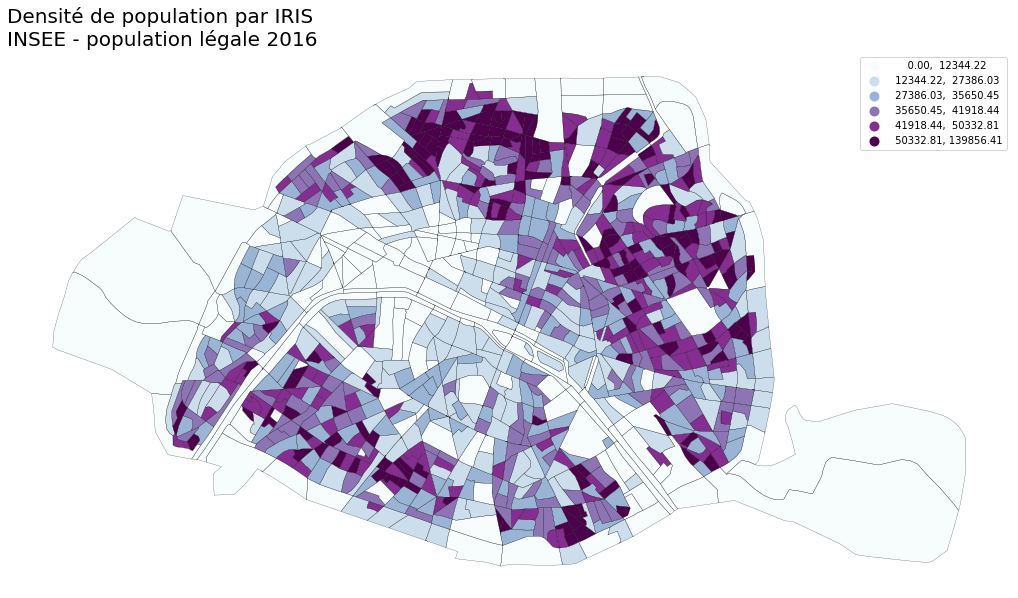

In [ ]:
#Faire une carte des densité de population par IRIS

Carte2, ax = plt.subplots(figsize=(18,16))
IRISPARIS.boundary.to_crs('EPSG:2154').plot(ax=ax, linewidth=0.2, color = 'black')
IRIS2154.plot(ax=ax, k=6, column='Densitebis', cmap='BuPu',scheme='quantiles', legend=True)
ax.axis("off")
plt.title('Densité de population par IRIS\nINSEE - population légale 2016', 
          loc='left', fontsize=20)
plt.show()

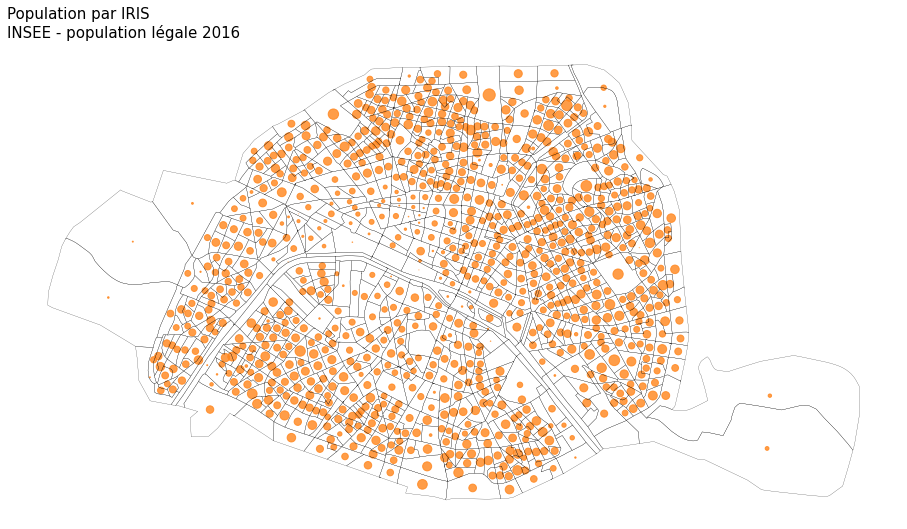

In [ ]:
# Faire une carte des populations par IRIS


IRIScentro = IRIS2154.copy()
IRIScentro.geometry = IRIScentro['geometry'].centroid

Carte3, ax = plt.subplots(figsize=(16,14))
IRISPARIS.boundary.to_crs('EPSG:2154').plot(ax=ax, linewidth=0.2, color = 'black')
IRIScentro.plot(ax=ax, color="#FF851B", markersize=IRIScentro['Population']/50, alpha=0.8, categorical=False, legend=True)
ax.axis("off")
plt.title('Population par IRIS\nINSEE - population légale 2016', 
          loc='left', fontsize=15)
plt.show()

## Dissolve(With Stat)

,geometry,iris,nom_iris,typ_iris,dep,insee_com,code_iris,c_ir,l_ir,nb_log,nb_logvac,nb_loc_social,txlogvac
nom_com,,,,,,,,,,,,,
Paris 10e Arrondissement,"POLYGON ((2.37022 48.88240, 2.37024 48.88151, ...",3711,Saint-Vincent de Paul 11,A,75,75110,751103711,751103711,Saint-Vincent de Paul 11,1945.000264,152.491099,82.635858,7.840158
Paris 11e Arrondissement,"POLYGON ((2.36664 48.86312, 2.36616 48.86396, ...",4318,Roquette 18,H,75,75111,751114318,751114318,Roquette 18,1654.497143,118.252164,10.132180,7.147318
Paris 12e Arrondissement,"POLYGON ((2.36897 48.84252, 2.36810 48.84321, ...",4604,Picpus 4,H,75,75112,751124604,751124604,Picpus 4,1550.497711,118.469809,533.284141,7.640760
Paris 13e Arrondissement,"POLYGON ((2.34155 48.82839, 2.34149 48.82857, ...",5103,Maison Blanche 3,H,75,75113,751135103,751135103,Maison Blanche 3,1279.499274,43.570540,566.600953,3.405281
Paris 14e Arrondissement,"POLYGON ((2.30187 48.82500, 2.30132 48.82513, ...",5306,Montparnasse 6,H,75,75114,751145306,751145306,Montparnasse 6,1459.997441,98.603414,10.370042,6.753670


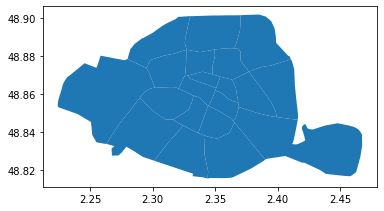

In [ ]:
# Créer une couche des arrondissements

ARDT = IRISPARIS.dissolve(by='nom_com')
ARDT.plot()
ARDT.head()

In [ ]:
# Créer une couche des arrondissements avec une agrégation statistiques (Population)

ARDT = IRIS2154.dissolve(by='insee_com', aggfunc='sum')
ARDT.head()


,geometry,iris,dep,code_iris,Code_IRIS,Densite,Population,surface,Densitebis
insee_com,,,,,,,,,
75101,"POLYGON ((651906.000 6861749.600, 651826.500 6...",3644,1275,12767173644,12767173644,1967.022210,16545.0,1.827486,196419.344299
75102,"POLYGON ((650836.900 6863382.070, 650766.800 6...",9534,1050,10514289534,10514289534,3247.766238,20796.0,0.994136,328710.884634
75103,"POLYGON ((652319.300 6862646.600, 652328.020 6...",17745,1275,12767527745,12767527745,5578.791156,35049.0,1.171823,557159.554395
75104,"POLYGON ((652234.790 6861585.390, 652145.040 6...",30725,1575,15771870725,15771870725,3564.653997,27146.0,1.619944,359457.988367
75105,"POLYGON ((651328.600 6860229.400, 651363.510 6...",57514,2325,23282607514,23282607514,8262.940652,59333.0,2.516924,834564.296242


In [ ]:
ARDT["Population"].sum()

2206488.0000000005

### Exercice avec les données de logement des IRIS

https://opendata.apur.org/datasets/recensement-iris-logement/data


* Produire une carte avec en cercle proportionnels le nombre de logement sociaux 
* Produire une carte avec en aplat de couleur le taux de logement vacant



In [ ]:
#Téléchargement des datas depuis l'opendata (https://opendata.apur.org/datasets/recensement-iris-population/geoservice)
!wget -O logement.csv https://opendata.arcgis.com/datasets/a57b54a5ae1046068a203d13d744343b_2.csv?outSR=%7B%22latestWkid%22%3A2154%2C%22wkid%22%3A102110%7D

--2021-03-01 16:45:15--  https://opendata.arcgis.com/datasets/a57b54a5ae1046068a203d13d744343b_2.csv?outSR=%7B%22latestWkid%22%3A2154%2C%22wkid%22%3A102110%7D
Resolving opendata.arcgis.com (opendata.arcgis.com)... 52.4.203.140, 52.4.211.32, 3.209.95.31, ...
Connecting to opendata.arcgis.com (opendata.arcgis.com)|52.4.203.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘logement.csv’

logement.csv            [  <=>               ]   3.40M  9.09MB/s    in 0.4s    

2021-03-01 16:45:17 (9.09 MB/s) - ‘logement.csv’ saved [3560464]



In [ ]:
#Importer CSV to dataframe

logement = pd.read_csv("logement.csv", sep=',')
logement.head(3)

,OBJECTID,n_sq_ir,c_cainsee,n_qu,c_ir,c_typeir,l_ir,m2_ip,m2_pop,m2_emp,nb_log,nb_rp,nb_rsecocc,nb_logvac,pct_rp,pct_rsecocc,pct_logvac,nb_log_n5,nb_rp_n5,nb_rsecocc_n5,nb_logvac_n5,pct_rp_n5,pct_rsecocc_n5,pct_logvac_n5,evo_nb_log,evo_pct_log,evo_pct_rp,evo_pct_rsecocc,evo_pct_logvac,nb_pieces_rp,nb_moy_perspiece,nb_prop,nb_loc_prive,nb_loc_social,nb_gratuit,pct_prop,pct_loc_prive,pct_loc_social,pct_gratuit,nb_pieces_rp_n5,...,pct_loc_social_n5,pct_gratuit_n5,evo_pct_prop,evo_pct_loc_prive,evo_pct_loc_social,evo_pct_gratuit,nb_rp_1p,nb_rp_2p,nb_rp_3p,nb_rp_4p,nb_rp_5pp,pct_rp_1p,pct_rp_2p,pct_rp_3p,pct_rp_4p,pct_rp_5pp,nb_rp_1p_n5,nb_rp_2p_n5,nb_rp_3p_n5,nb_rp_4p_n5,nb_rp_5pp_n5,pct_rp_1p_n5,pct_rp_2p_n5,pct_rp_3p_n5,pct_rp_4p_n5,pct_rp_5pp_n5,evo_pct_rp_1p,evo_pct_rp_2p,evo_pct_rp_3p,evo_pct_rp_4p,evo_pct_rp_5pp,nb_men_voit,pct_men_voit,nb_men_voit_n5,pct_men_voit_n5,evo_pct_men_voit,n_sq_epci,l_epci,shape_Length,shape_Area
0,1,930003891,93048,0.0,930480801,H,Bel Air Grands Pêchers 1,115523.688783,106227.518051,114780.364397,1215.000069,1152.805590,19.459808,42.734671,94.881113,1.601630,3.517257,1222.996726,1172.816794,7.993616,42.186316,95.896969,0.653609,3.449422,-7.996657,-0.653858,-1.015856,0.948021,0.067835,3345.776748,0.764260,560.050705,191.722344,382.744007,18.288533,48.581540,16.630935,33.201089,1.586437,3382.035273,...,39.662029,2.486245,7.263929,0.096819,-6.460940,-10.870567,139.458671,343.525777,332.156141,205.238045,132.426956,12.097328,29.799107,28.812850,17.803353,11.487362,122.702461,316.568701,435.219099,217.493086,80.833448,10.462202,26.992170,37.108873,18.544506,6.892249,1.635126,2.806938,-8.296024,-0.741154,4.595114,674.180839,58.481746,716.254373,61.071292,-2.589546,140.0,T8 Est Ensemble,1927.186327,139705.062882
1,2,930003875,93048,0.0,930480803,H,Bel Air Grands Pechers 3,88014.547679,80896.936435,81518.540816,827.500048,798.698213,1.017957,27.783878,96.519416,0.123016,3.357568,760.997964,729.426824,0.000000,31.571140,95.851350,0.000000,4.148650,66.502084,8.738799,0.668066,0.123016,-0.791082,2399.448585,0.818257,122.889304,124.417161,548.040149,3.351598,15.386200,15.577493,68.616674,0.419633,2296.487677,...,70.972545,1.037145,2.210358,0.763026,-2.355871,-4.213619,53.187556,227.772657,284.861463,143.500867,89.375669,6.659281,28.517988,35.665719,17.966845,11.190168,40.921335,136.541421,290.754600,207.632850,53.576617,5.610067,18.719002,39.860695,28.465206,7.345030,1.049214,9.798986,-4.194975,-10.498362,3.845138,437.745301,54.807347,374.788998,51.381302,3.426045,140.0,T8 Est Ensemble,1597.143066,106750.396820
2,3,930003874,93048,0.0,930480901,H,Ramenas Fabien Lagrange 1,158411.119470,138753.241185,149619.390800,1007.500054,912.101645,12.087402,83.311007,90.531176,1.199742,8.269082,942.497554,876.358827,12.591479,53.547248,92.982610,1.335969,5.681420,65.002500,6.896835,-2.451434,-0.136227,2.587662,2428.780086,0.791884,340.672556,421.808885,135.500873,14.119332,37.350284,46.245820,14.855896,1.548000,2535.264590,...,10.290437,2.671876,-1.938474,-1.503110,4.565460,-9.295885,163.441960,294.829000,264.661089,102.650929,86.518667,17.919270,32.324139,29.016622,11.254330,9.485639,198.136874,184.757914,215.185998,155.910171,122.367870,22.609103,21.082450,24.554554,17.790677,13.963215,-4.689833,11.241688,4.462069,-6.536347,-4.477577,514.408272,56.398130,513.187423,58.559052,-2.160922,140.0,T8 Est Ensemble,2494.946453,209582.967651


In [ ]:
# Ne garder que les colonne importantes

LogementOK = logement[["c_ir", "l_ir", "nb_log", "nb_logvac", "nb_loc_social"]]
LogementOK.head()

,c_ir,l_ir,nb_log,nb_logvac,nb_loc_social
0,930480801,Bel Air Grands Pêchers 1,1215.000069,42.734671,382.744007
1,930480803,Bel Air Grands Pechers 3,827.500048,27.783878,548.040149
2,930480901,Ramenas Fabien Lagrange 1,1007.500054,83.311007,135.500873
3,930480903,Ramenas Fabien Lagrange 3,1174.500064,104.873548,349.870857
4,930481002,Branly Boissiere 2,713.000038,50.006217,139.873760


In [ ]:
# Faire la jointure attributaire

IRISPARIS = IRISPARIS.merge(LogementOK, left_on='code_iris', right_on='c_ir')
IRISPARIS.head(2)


,iris,nom_iris,typ_iris,dep,insee_com,nom_com,code_iris,geometry,c_ir,l_ir,nb_log,nb_logvac,nb_loc_social
0,1907,Val de Grace 7,H,75,75105,Paris 5e Arrondissement,751051907,"POLYGON ((2.34364 48.84122, 2.34424 48.84245, ...",751051907,Val-de-Grace 7,1325.507235,98.032090,89.589028
1,2807,Gros Caillou 7,H,75,75107,Paris 7e Arrondissement,751072807,"POLYGON ((2.30090 48.85113, 2.29990 48.85173, ...",751072807,Gros Caillou 7,1289.498225,53.253745,3.273282


In [ ]:
#Calculer le taux de logements vacant


IRISPARIS["txlogvac"] = IRISPARIS["nb_logvac"] / IRISPARIS["nb_log"] *100
IRISPARIS.head()

,iris,nom_iris,typ_iris,dep,insee_com,nom_com,code_iris,geometry,c_ir,l_ir,nb_log,nb_logvac,nb_loc_social,txlogvac
0,1907,Val de Grace 7,H,75,75105,Paris 5e Arrondissement,751051907,"POLYGON ((2.34364 48.84122, 2.34424 48.84245, ...",751051907,Val-de-Grace 7,1325.507235,98.032090,89.589028,7.395817
1,2807,Gros Caillou 7,H,75,75107,Paris 7e Arrondissement,751072807,"POLYGON ((2.30090 48.85113, 2.29990 48.85173, ...",751072807,Gros Caillou 7,1289.498225,53.253745,3.273282,4.129804
2,3103,Madeleine 3,A,75,75108,Paris 8e Arrondissement,751083103,"POLYGON ((2.31961 48.87451, 2.31962 48.87449, ...",751083103,Madeleine 3,674.212770,86.884528,42.172518,12.886811
3,4318,Roquette 18,H,75,75111,Paris 11e Arrondissement,751114318,"POLYGON ((2.38202 48.86019, 2.38281 48.85939, ...",751114318,Roquette 18,1654.497143,118.252164,10.132180,7.147318
4,4114,Folie Mericourt 14,H,75,75111,Paris 11e Arrondissement,751114114,"POLYGON ((2.37303 48.87062, 2.37301 48.87041, ...",751114114,Folie Mericourt 14,1232.497955,172.140363,0.000000,13.966787


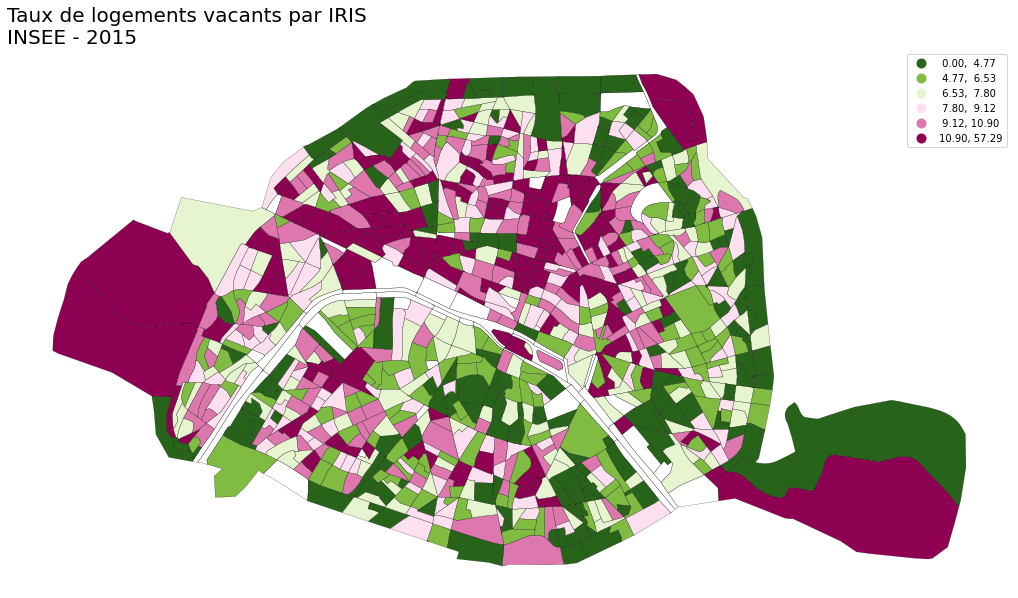

In [ ]:
#Faire une carte du taux de logementd vacants par IRIS

Carte4, ax = plt.subplots(figsize=(18,16))
IRISPARIS.boundary.plot(ax=ax, linewidth=0.2, color = 'black')
IRISPARIS.plot(ax=ax, k=6, column='txlogvac', cmap='PiYG_r',scheme='quantiles', legend=True)
ax.axis("off")
plt.title('Taux de logements vacants par IRIS\nINSEE - 2015', 
          loc='left', fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """


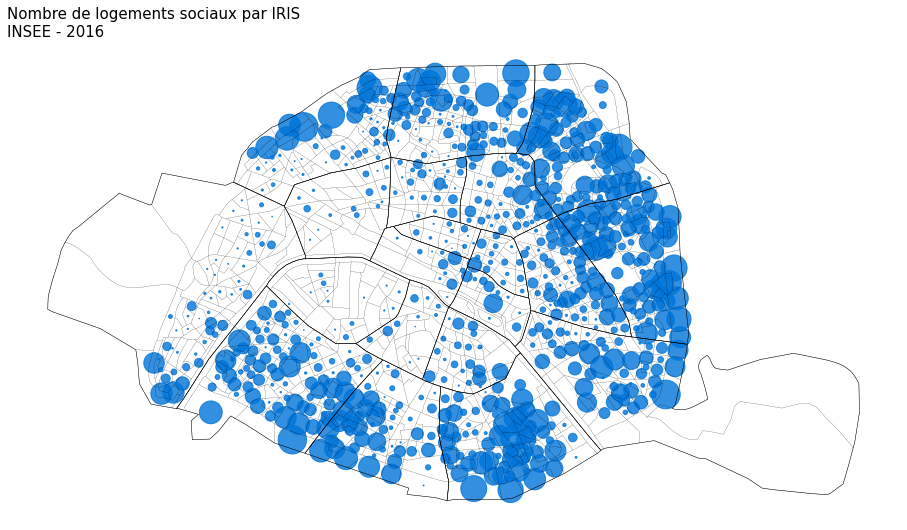

In [ ]:
# Faire une carte des populations par IRIS


IRIScentro = IRISPARIS.copy()
IRIScentro.geometry = IRIScentro['geometry'].centroid

Carte5, ax = plt.subplots(figsize=(16,14))
ARDT.boundary.plot(ax=ax, linewidth=0.5, color = 'black')
IRISPARIS.boundary.plot(ax=ax, linewidth=0.1, color = 'black')
IRIScentro.plot(ax=ax, color="#0074D9", markersize=IRIScentro['nb_loc_social']/2, alpha=0.8, categorical=False, legend=True)
ax.axis("off")
plt.title('Nombre de logements sociaux par IRIS\nINSEE - 2016', 
          loc='left', fontsize=15)
plt.show()